In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

2024-05-29 08:27:19.617126: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 08:27:19.617228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 08:27:19.743148: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/nhis-vision-and-eye-health-surveillance-dataset/NHIS_Vision_and_Eye_Health_Surveillance_20240501.csv")

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract w...,Yes,65-84 years,...,QCATS,RYES,NaN,AGE6584,GF,ASN,RFDM,RFBD,NaN,NaN
1,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract w...,Yes,85 years and older,...,QCATS,RYES,NaN,AGE85PLUS,GM,OTH,RFDM,RFNO,NaN,NaN
2,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Refused,40-64 years,...,ISPROT,RRF,NaN,AGE4064,GALL,OTH,RFDM,RFYES,NaN,NaN
3,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Don't Know,40-64 years,...,ISPROT,RDK,NaN,AGE4064,GM,ALLRACE,RFDM,RFYES,NaN,NaN
4,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Some of the time,18-39 years,...,ISPROT,RSOMT,NaN,AGE1839,GM,ASN,RFDM,RFNO,NaN,NaN


In [4]:
df.describe()

,YearStart,YearEnd,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Numerator,Sample_Size,LocationID,DataValueTypeID,GeoLocation,Geographic Level
count,71649.000000,71649.000000,33154.000000,33154.000000,33154.000000,0.0,53859.000000,71649.0,0.0,0.0,0.0
mean,2015.673910,2016.673910,19.585614,17.347588,22.136642,NaN,2463.380401,59.0,NaN,NaN,NaN
std,0.738818,0.738818,30.037798,28.422199,31.424559,NaN,5538.926770,0.0,NaN,NaN,NaN
min,2014.000000,2015.000000,0.000000,0.000000,0.000000,NaN,30.000000,59.0,NaN,NaN,NaN
25%,2016.000000,2017.000000,0.500000,0.140000,1.310000,NaN,130.000000,59.0,NaN,NaN,NaN
50%,2016.000000,2017.000000,3.200000,2.180000,4.930000,NaN,477.000000,59.0,NaN,NaN,NaN
75%,2016.000000,2017.000000,22.087500,16.700000,28.940000,NaN,2008.000000,59.0,NaN,NaN,NaN
max,2016.000000,2017.000000,100.000000,98.570000,100.000000,NaN,70332.000000,59.0,NaN,NaN,NaN


In [5]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Category', 'Question', 'Response', 'Age', 'Gender',
       'RaceEthnicity', 'RiskFactor', 'RiskFactorResponse', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Numerator', 'Sample_Size', 'LocationID', 'TopicID', 'CategoryID',
       'QuestionID', 'ResponseID', 'DataValueTypeID', 'AgeID', 'GenderID',
       'RaceEthnicityID', 'RiskFactorID', 'RiskFactorResponseID',
       'GeoLocation', 'Geographic Level'],
      dtype='object')

In [6]:
df = df[['Topic','Category',	'Response'	,'Age',	'Gender',	'RaceEthnicity','RiskFactor',	'RiskFactorResponse','Data_Value','Low_Confidence_Limit','High_Confidence_Limit','Sample_Size']]
df

,Topic,Category,Response,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,Service Utilization,Cataract Surgery,Yes,65-84 years,Female,Asian,Diabetes,Borderline,NaN,NaN,NaN,NaN
1,Service Utilization,Cataract Surgery,Yes,85 years and older,Male,Other,Diabetes,No,NaN,NaN,NaN,NaN
2,Service Utilization,Eye Protection,Refused,40-64 years,All genders,Other,Diabetes,Yes,NaN,NaN,NaN,NaN
3,Service Utilization,Eye Protection,Don't Know,40-64 years,Male,All races,Diabetes,Yes,NaN,NaN,NaN,398.0
4,Service Utilization,Eye Protection,Some of the time,18-39 years,Male,Asian,Diabetes,No,16.63,8.40,28.23,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71644,Visual Function,Visual Field,Refused,40-64 years,All genders,Asian,All participants,Total,0.10,0.00,0.58,1084.0
71645,Visual Function,Visual Field,Somewhat difficult,18 years and older,Female,All races,All participants,Total,1.72,1.53,1.92,32539.0
71646,Visual Function,Visual Field,Not at all difficult,18-39 years,Female,All races,Smoking,Former smoker,95.46,93.54,96.95,1178.0
71647,Visual Function,Visual Field,Not at all difficult,18-39 years,Female,"Hispanic, any race",Diabetes,Yes,NaN,NaN,NaN,NaN


In [7]:
 
    
     
         
             
                 
                     
                         
                             
                                 
                                     
                                         
                                             
                                                 
                                                     
                                                         
                                                             
                                                                 
                                                                      
                                                                         
                                                                             
                                                                                 
                                                                                     
                                                                                        
                                                                                        
                                                                                         
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                             
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                vvvvvvvvvvvv
                                                                                                vvvvvvvvvvvvv
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                vv
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                v
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                v
                                                                                                vv
                                                                                                v
                                                                                                v
                                                                                            vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            c
                                                                                            
                                                                                            
                                                                                            
                                                                                            c
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            c
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            
                                                                                            cc
                                                                                            
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            cc
                                                                                            
                                                                                            cc
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            c
                                                                                            
                                                                                            
                                                                                            c
                                                                                            
                                                                                            
                                                                                            ccdf.dtypes

Topic                     object
Category                  object
Response                  object
Age                       object
Gender                    object
RaceEthnicity             object
RiskFactor                object
RiskFactorResponse        object
Data_Value               float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
Sample_Size              float64
dtype: object

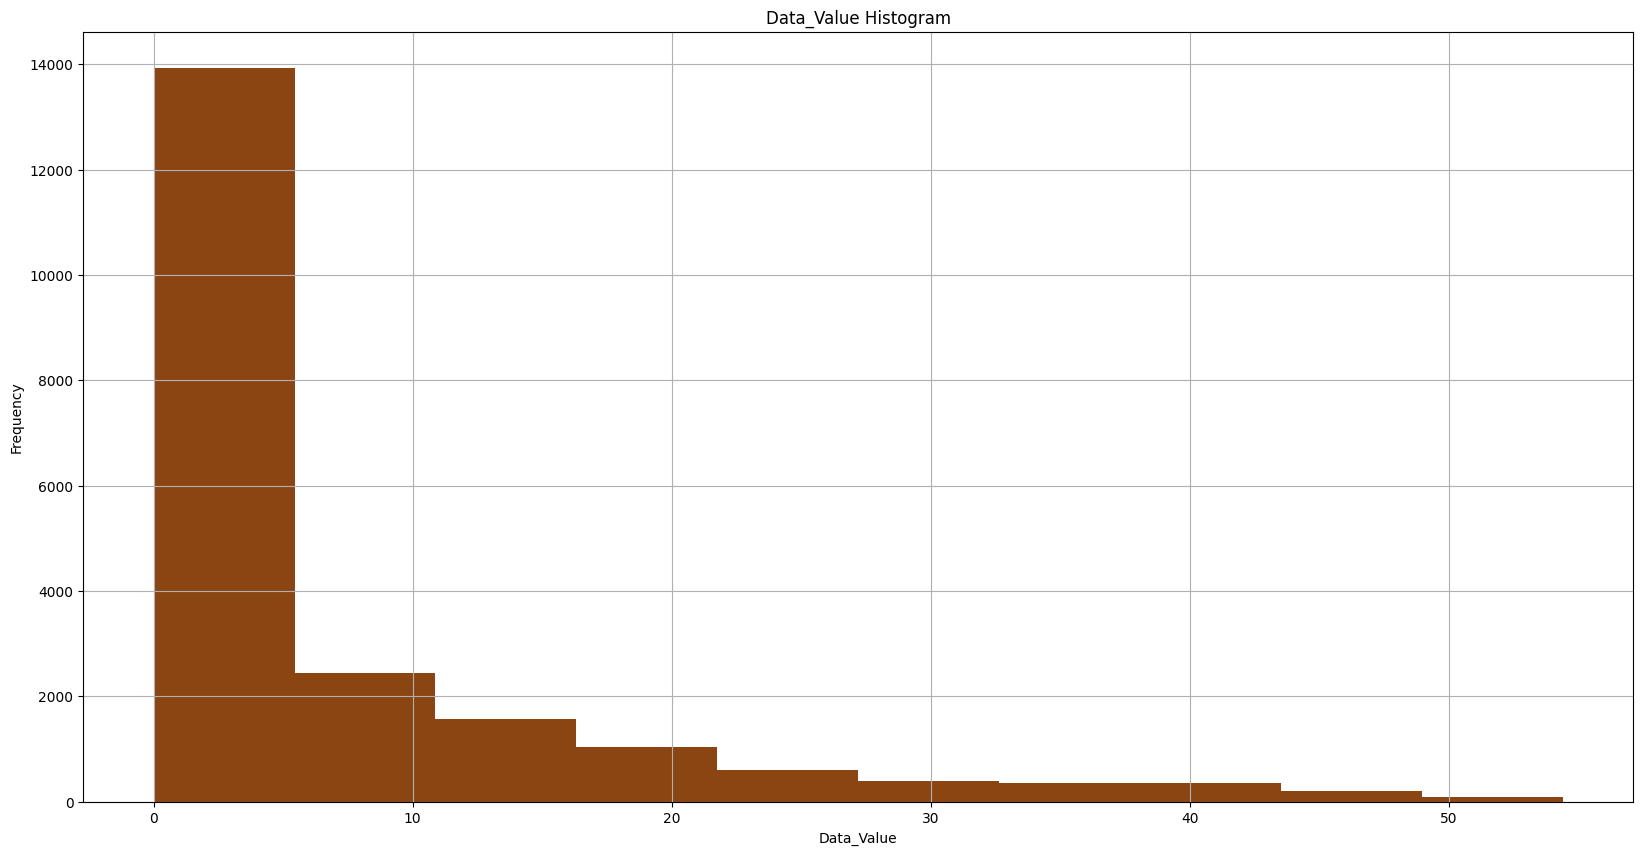

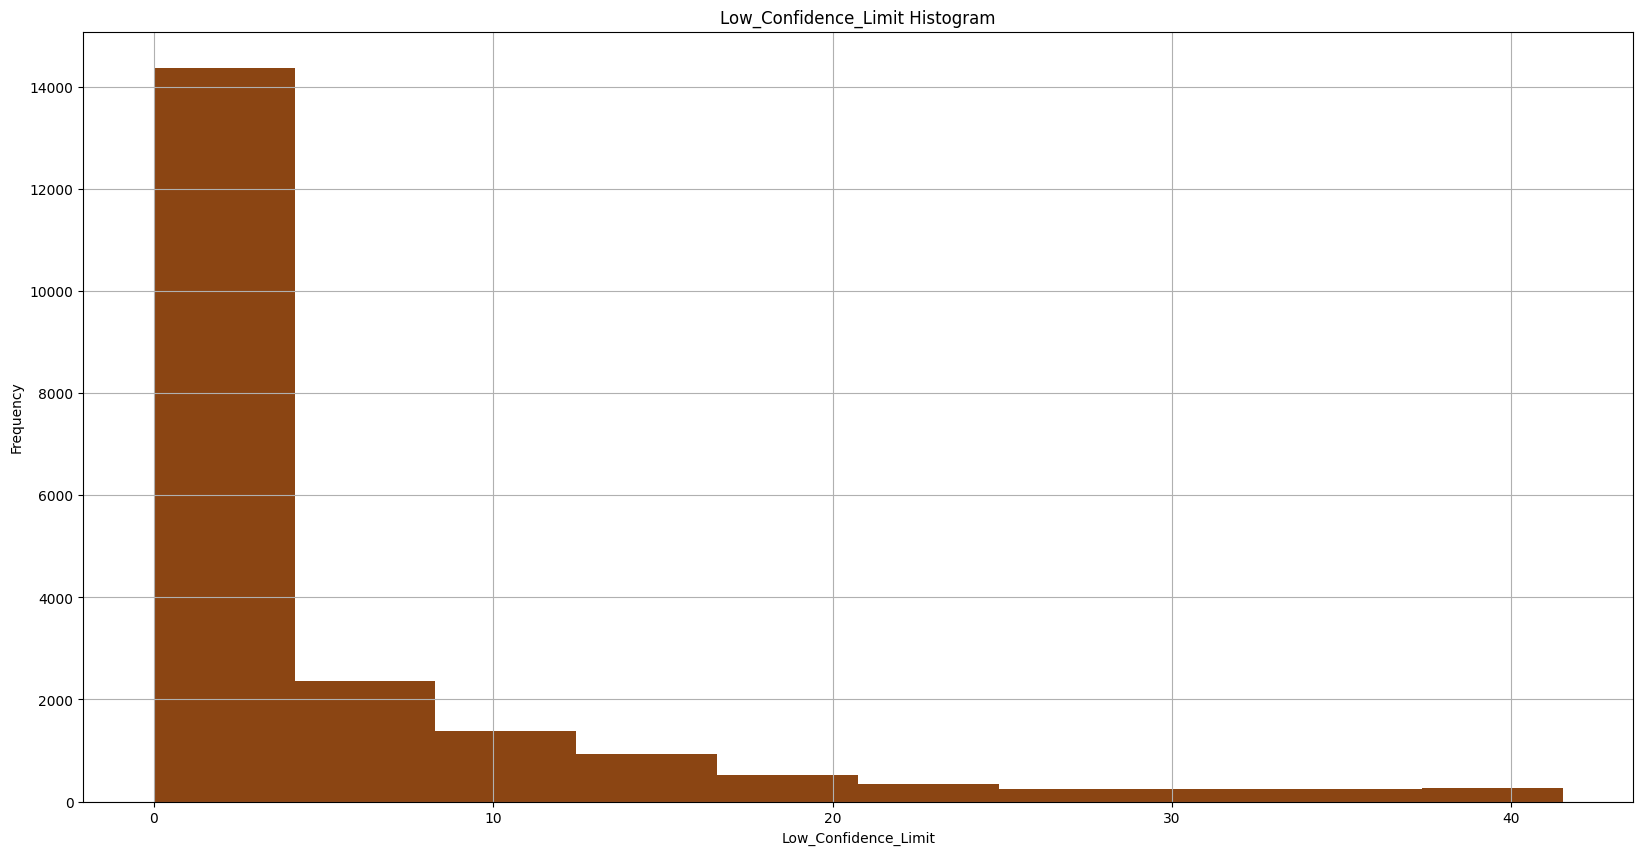

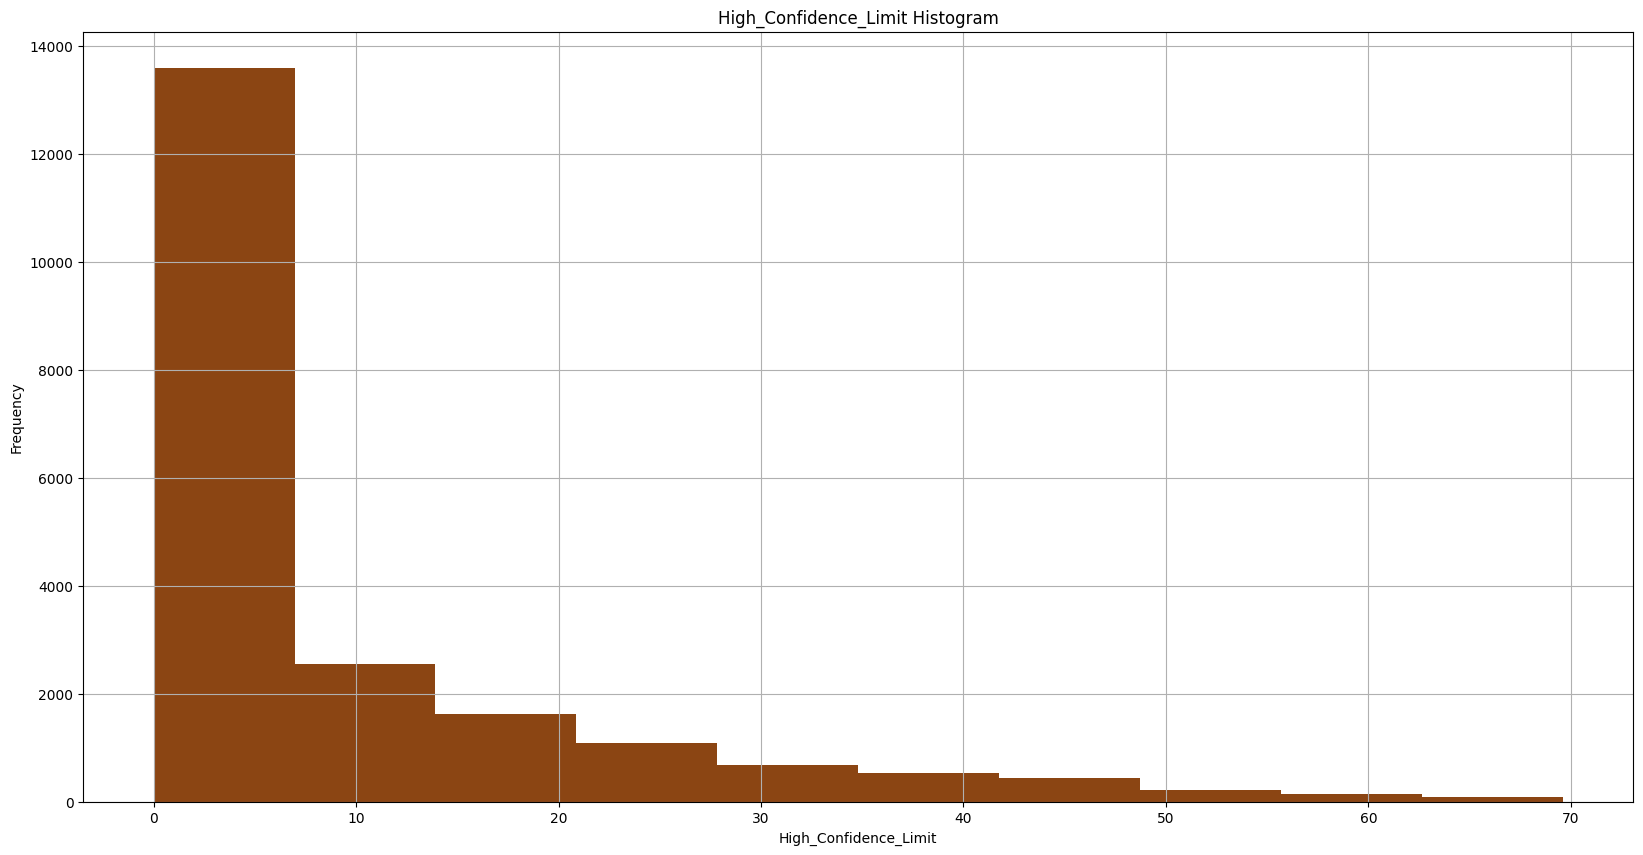

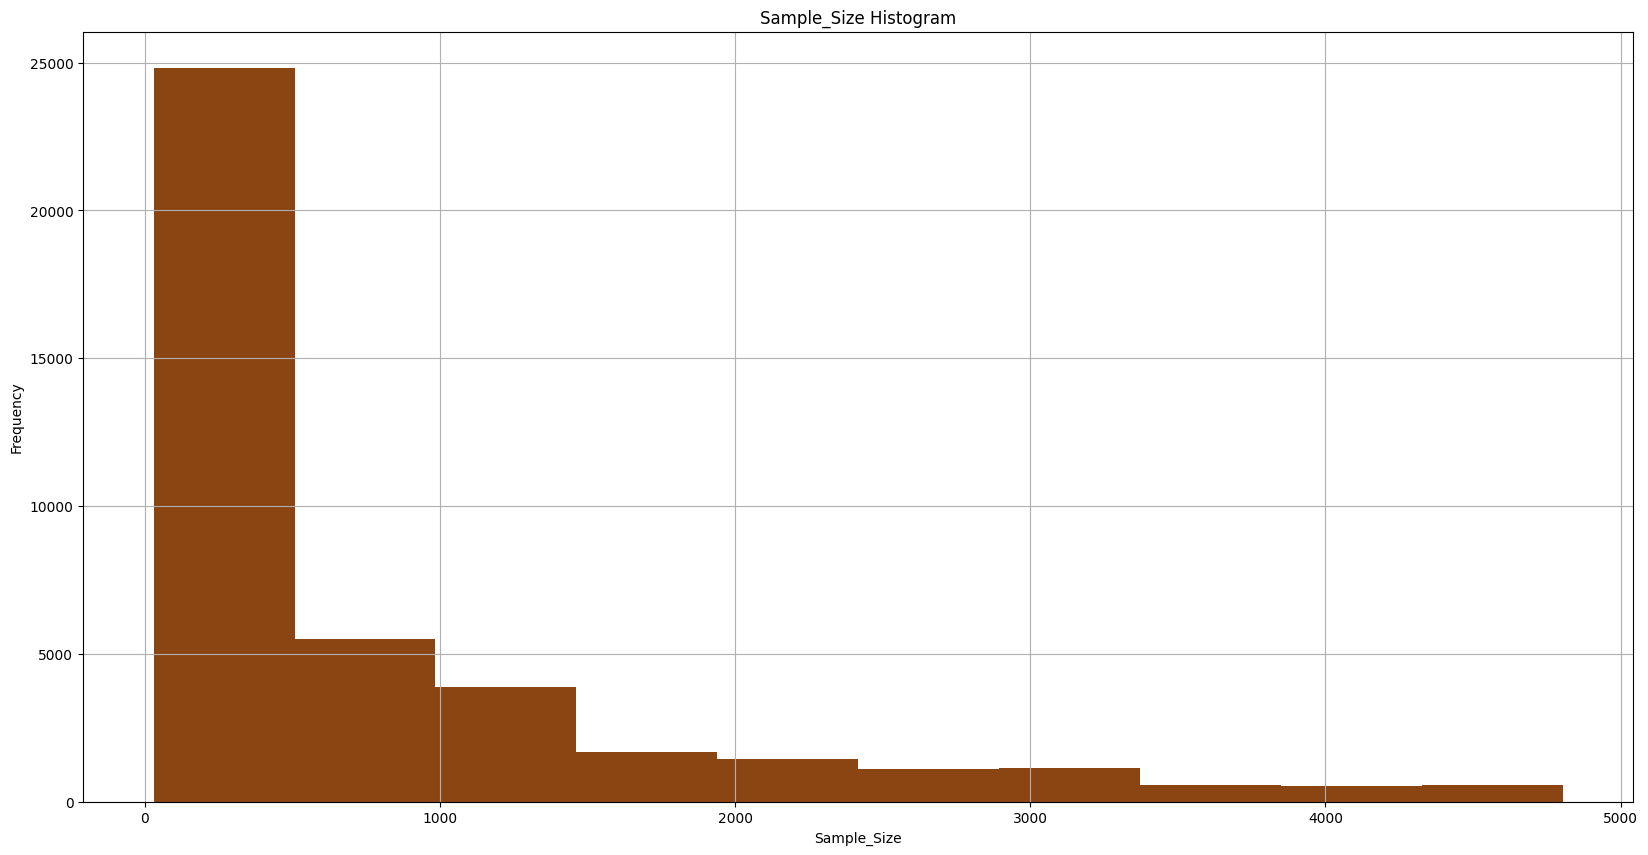

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set brown color palette
sns.set_palette(sns.color_palette(["#8B4513", "#A0522D", "#CD853F", "#D2691E", "#8B7E66", "#A67B5B", "#8B5A2B"]))

# Assuming df is your DataFrame
# Select only numeric columns for further calculations
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Calculate Q1, Q3, IQR for numeric columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for numeric columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# Plot histograms for each numeric column without outliers
for col in numerical_columns:
    plt.figure(figsize=(20, 10))
    df_no_outliers[col].hist()
    plt.title(f"{col} Histogram")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


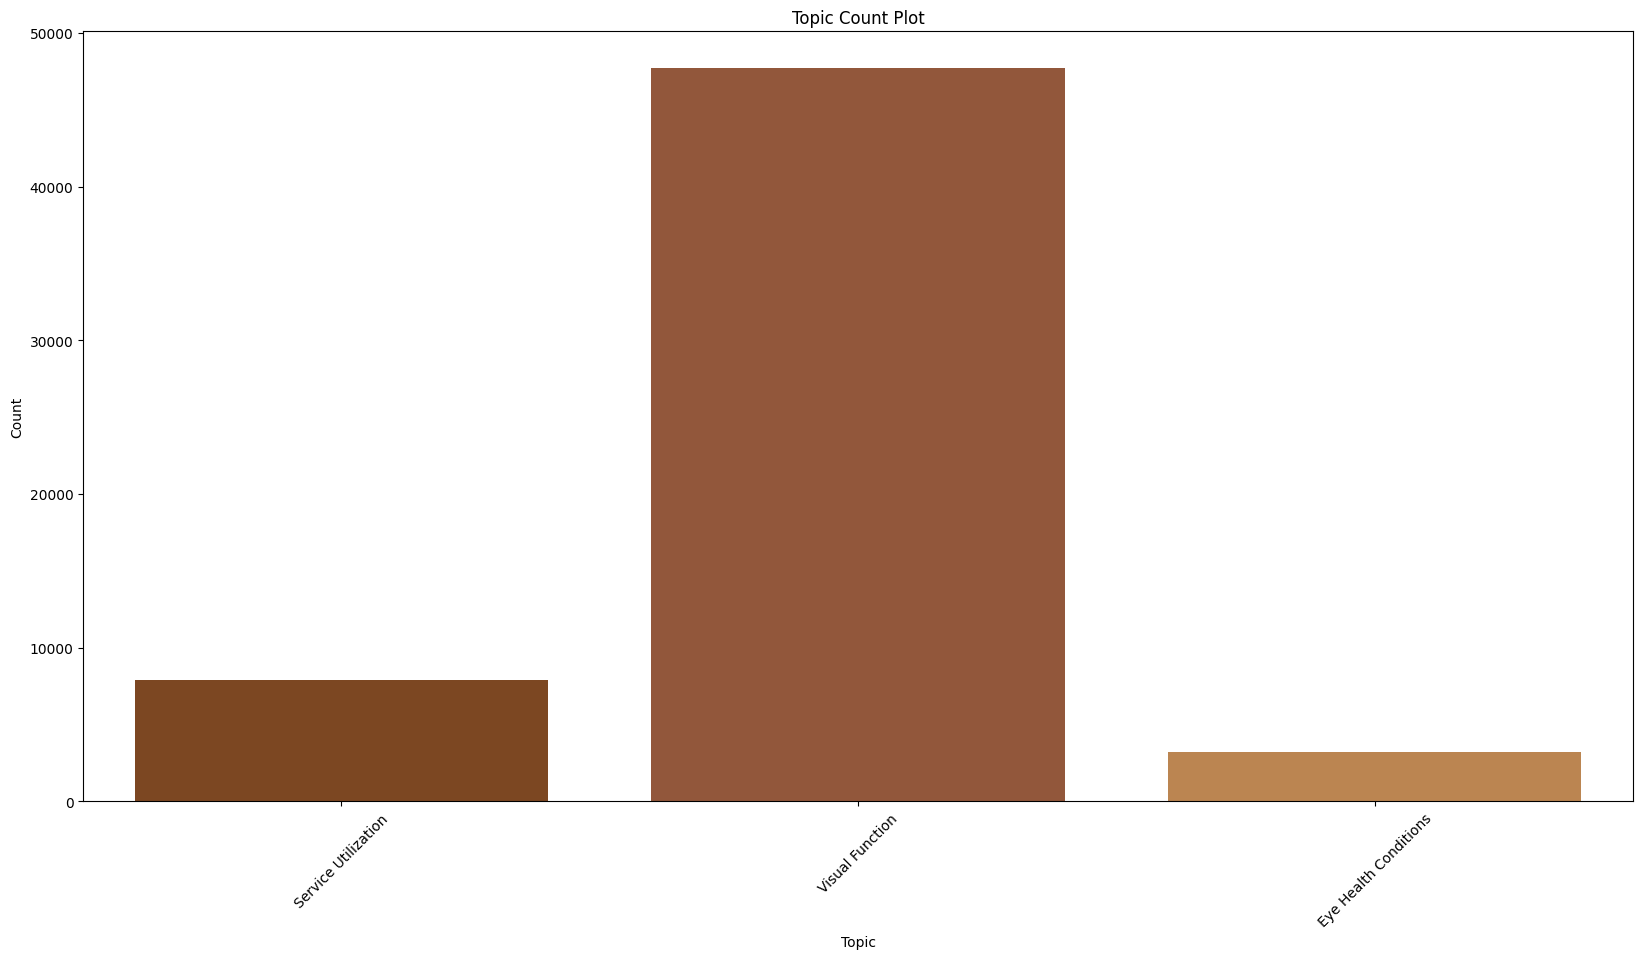

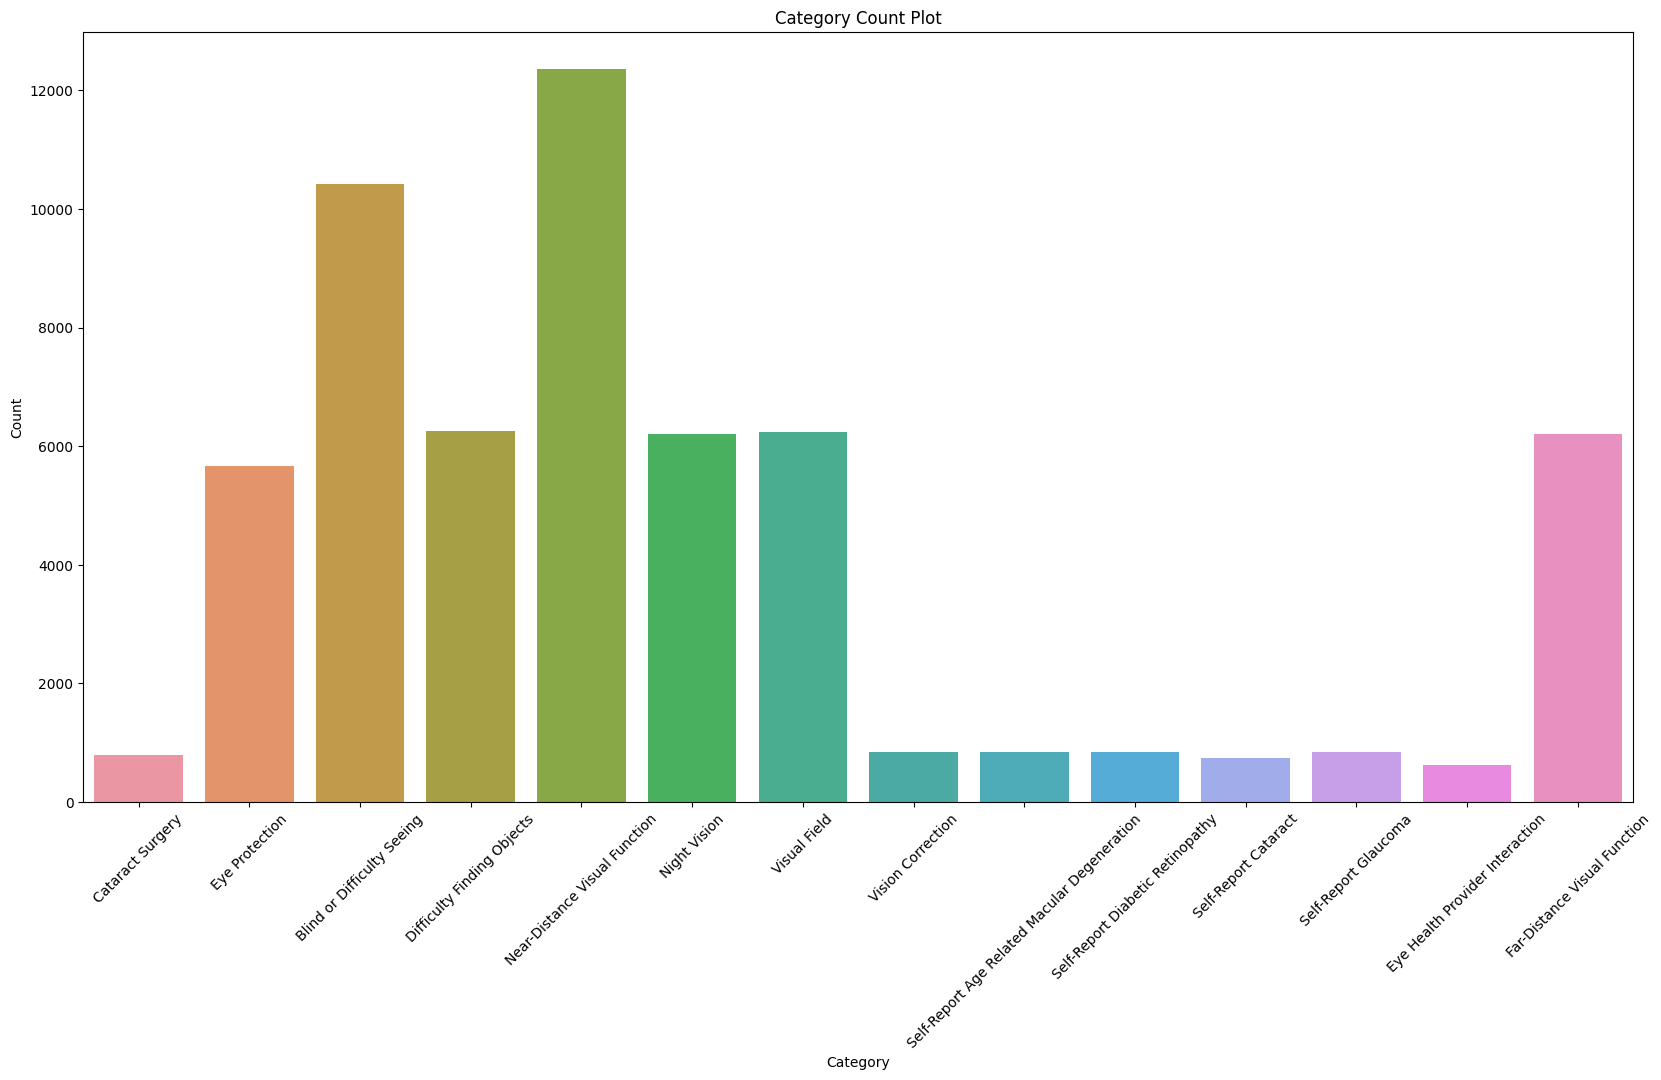

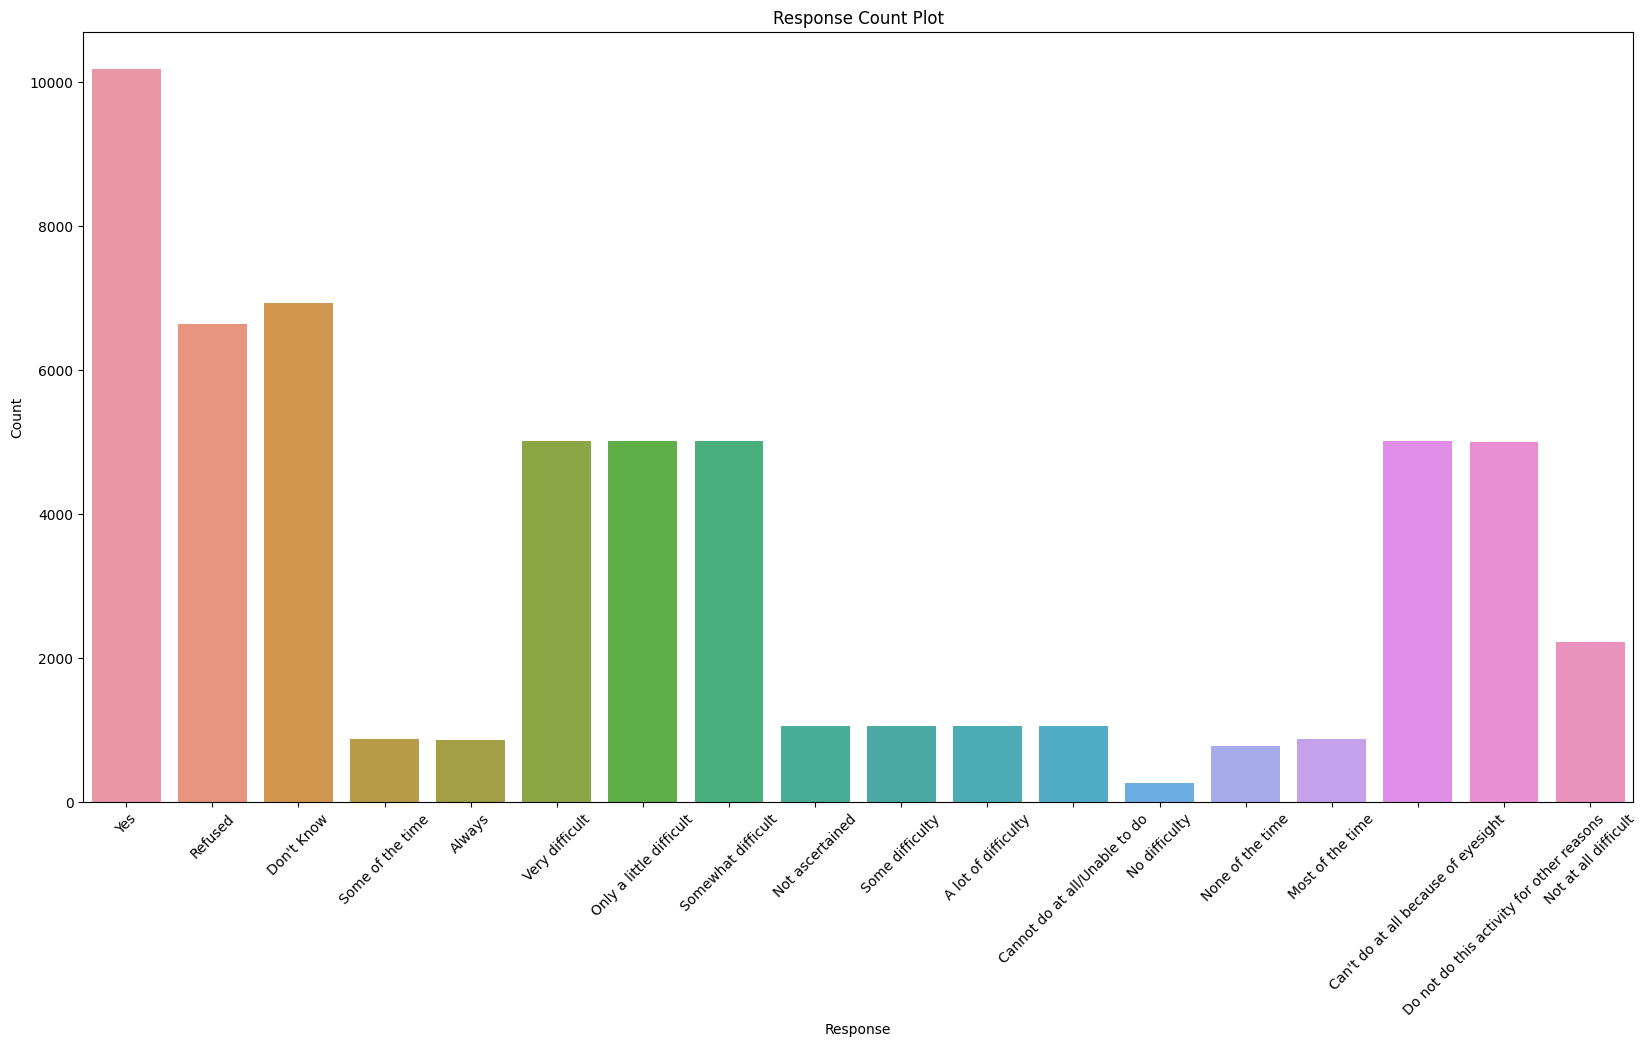

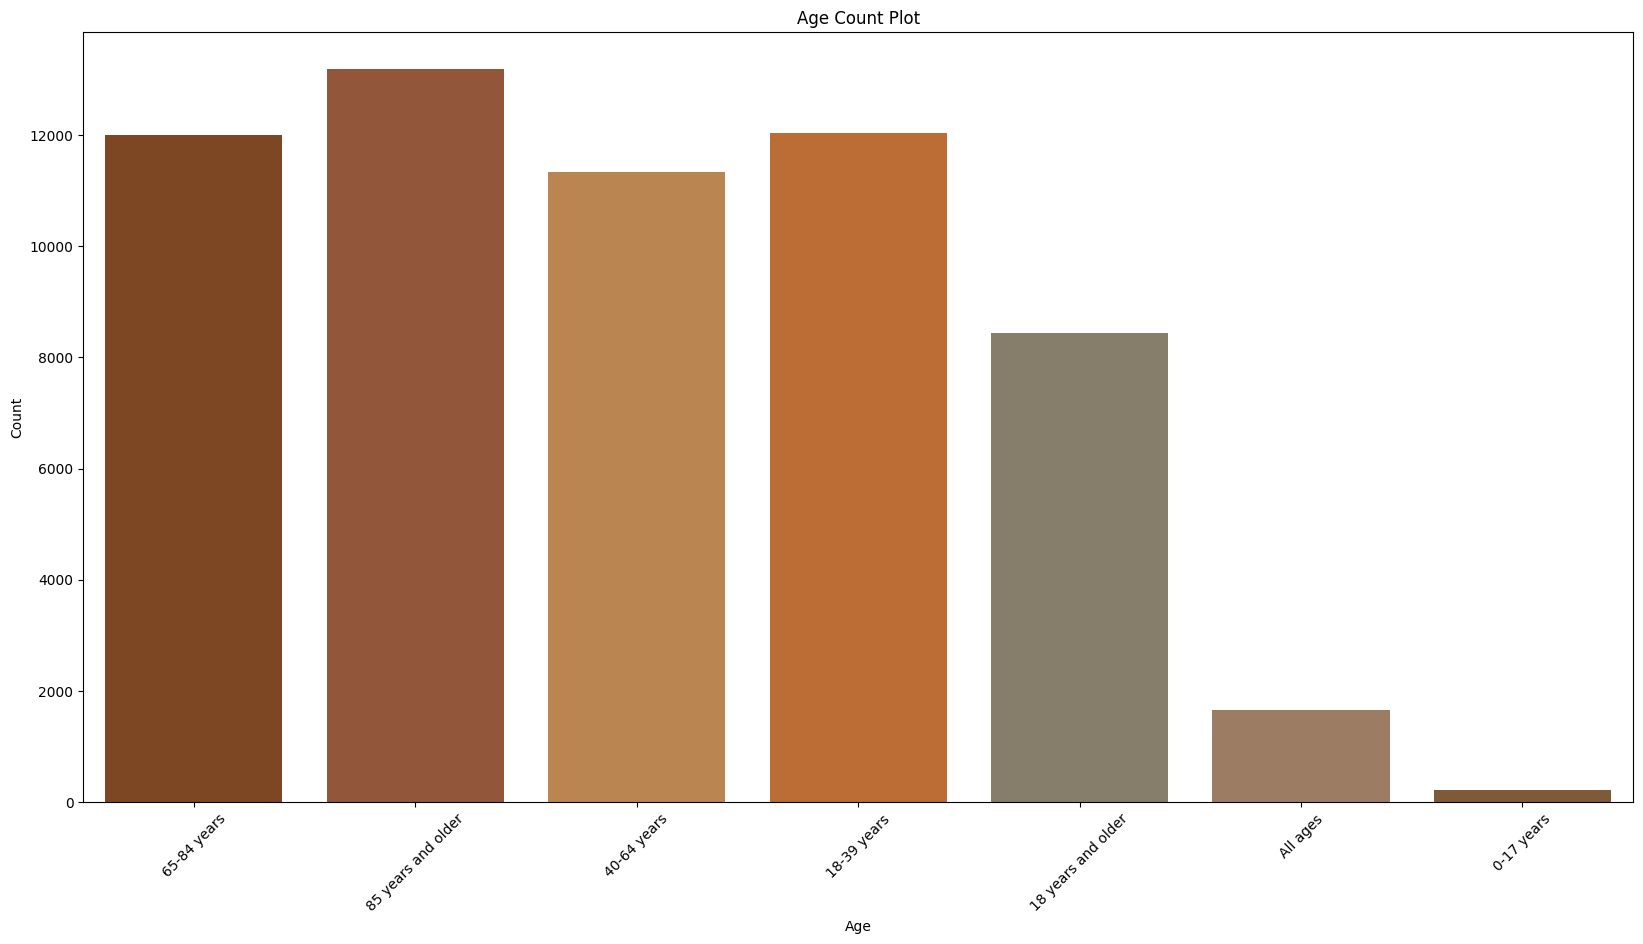

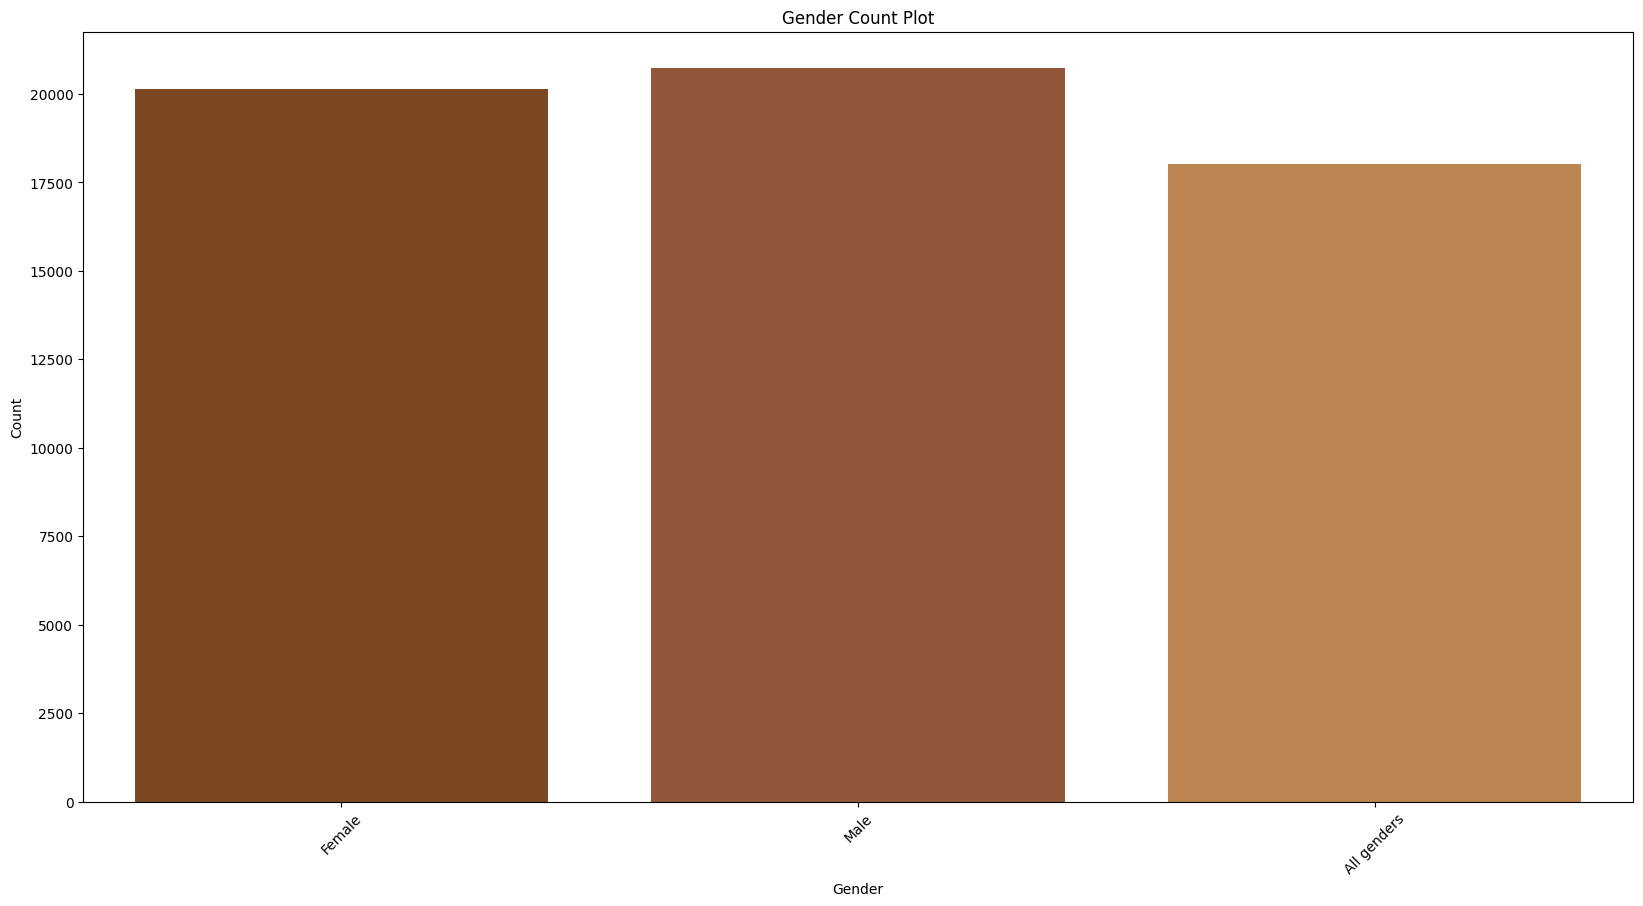

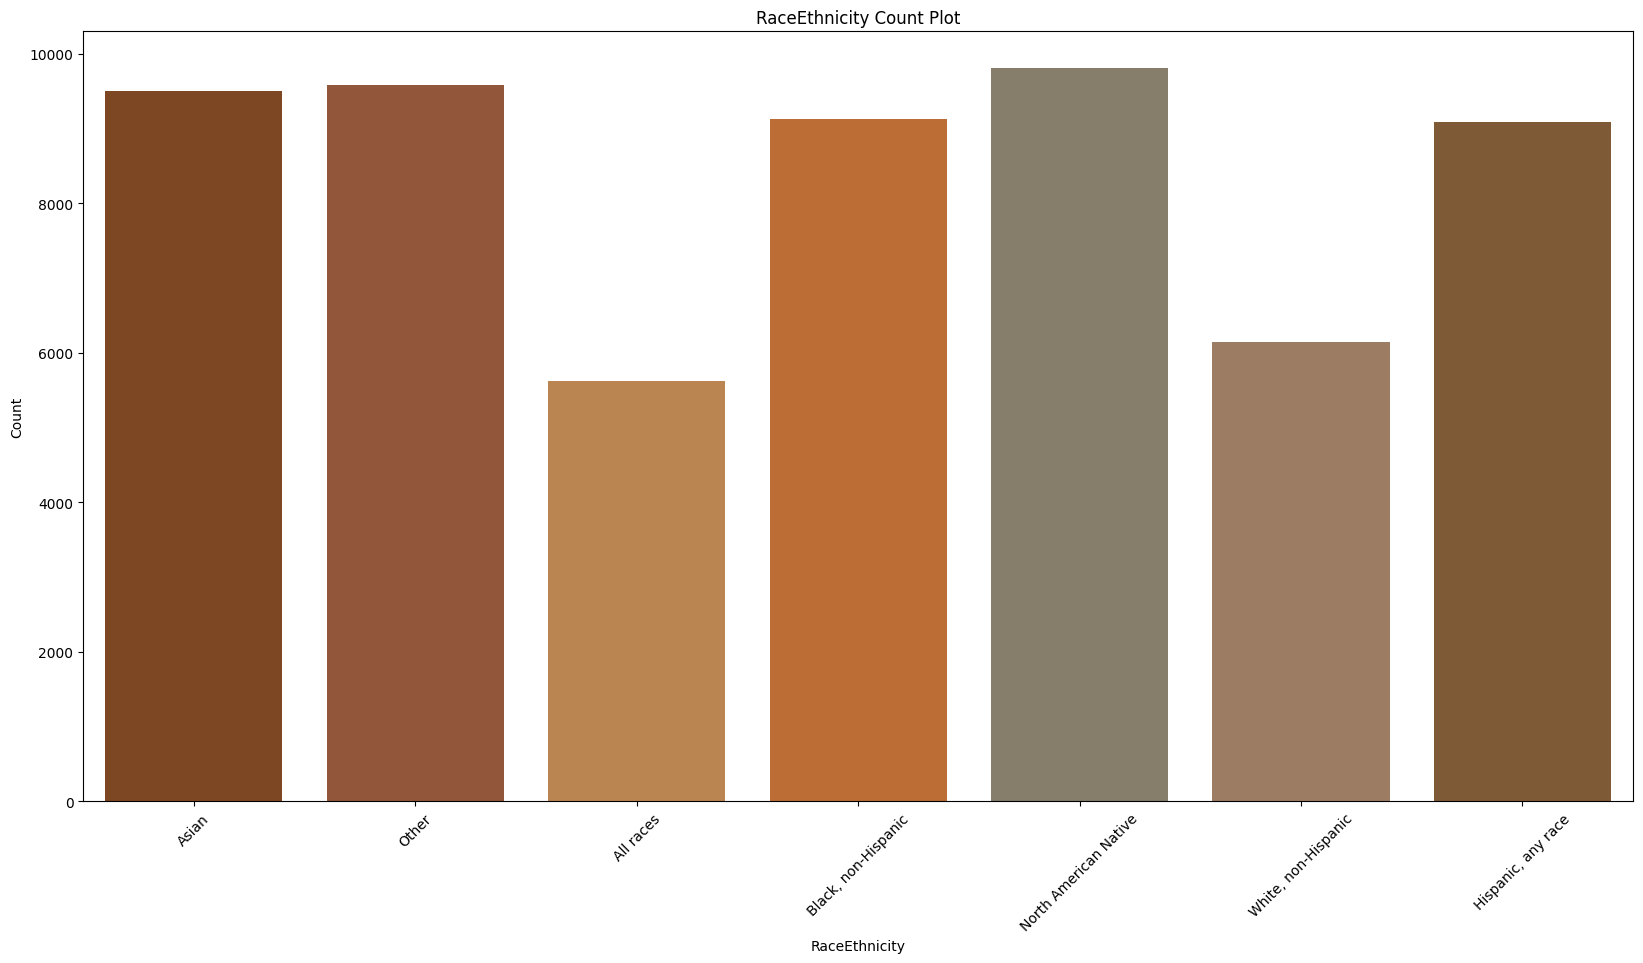

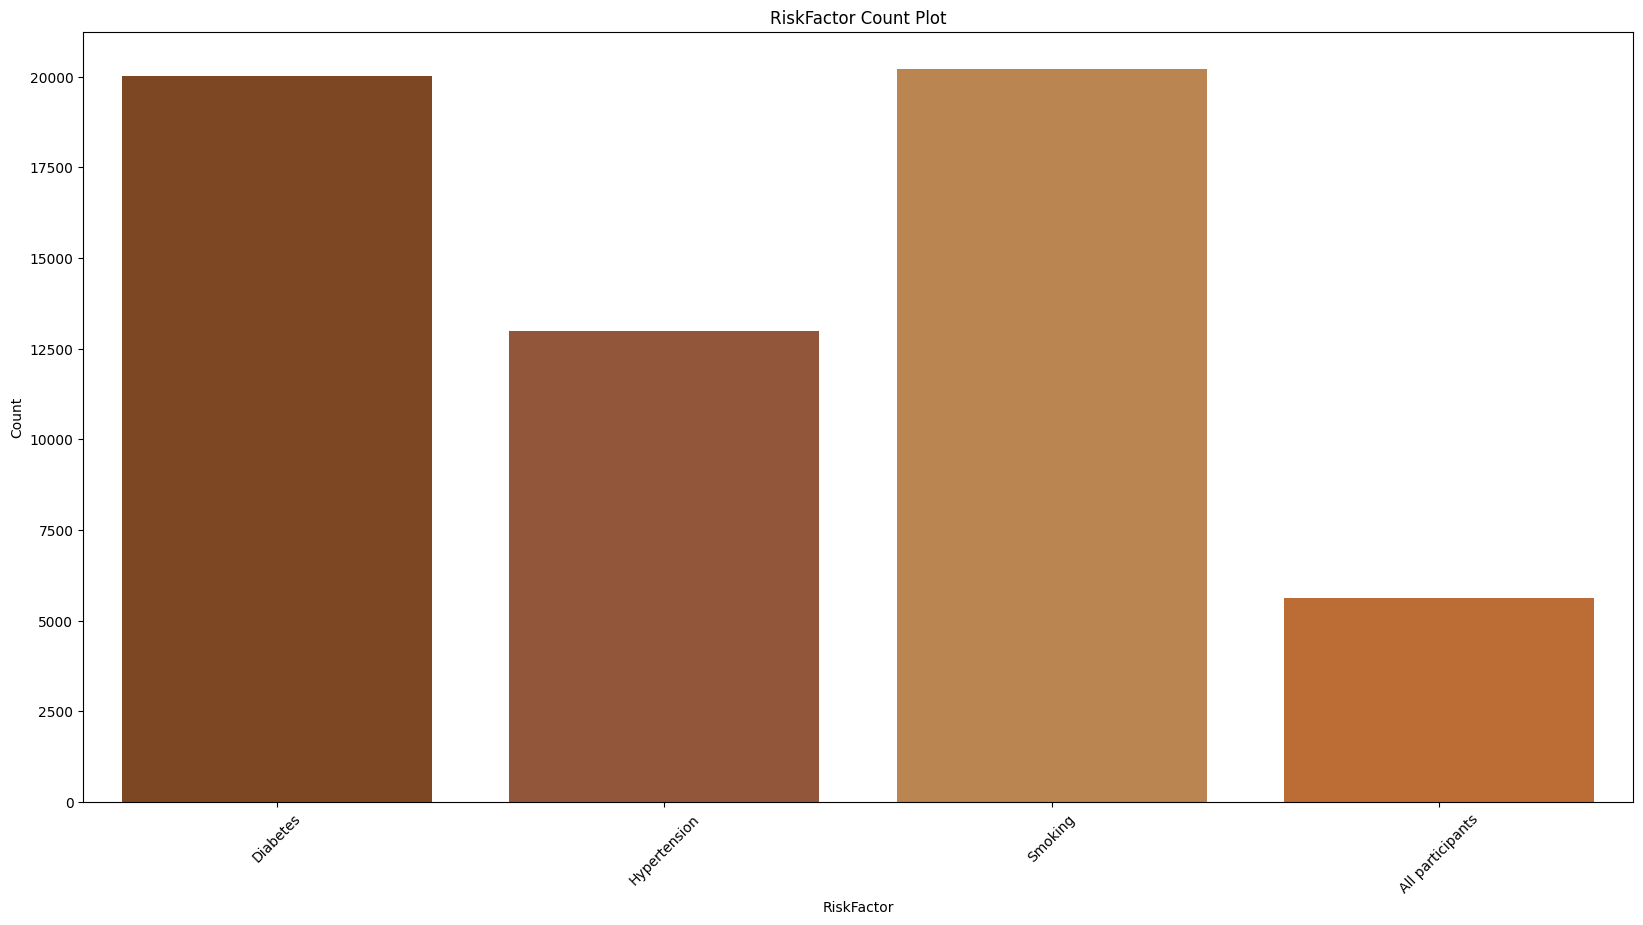

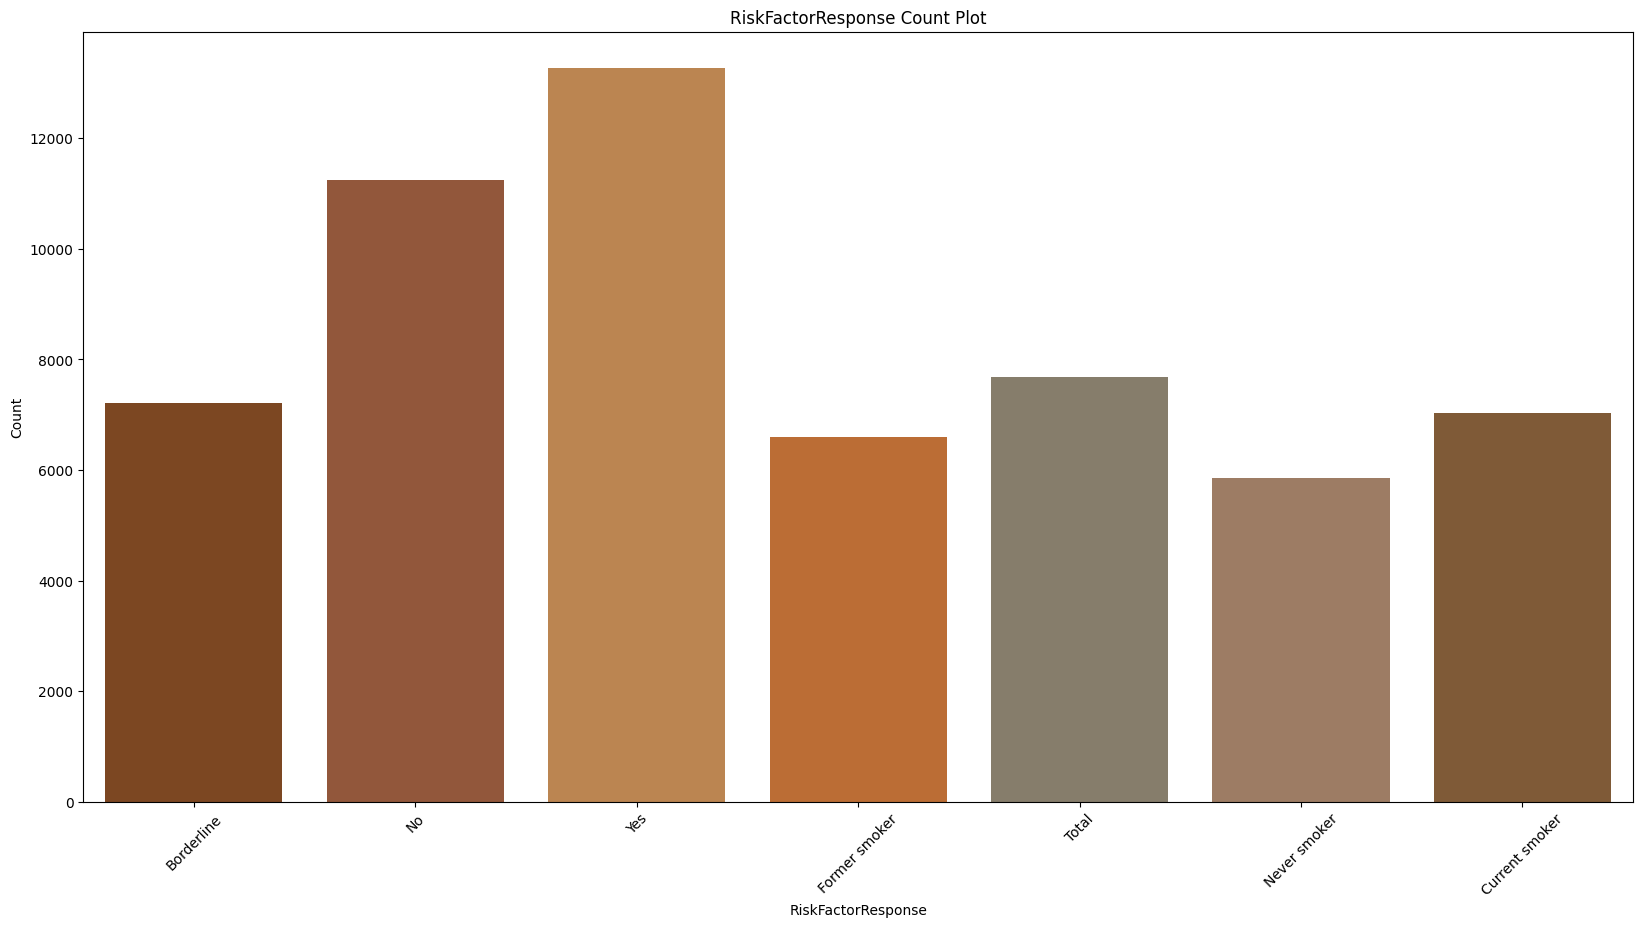

In [9]:
for col in df_no_outliers.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(20, 10))
    sns.countplot(data=df_no_outliers, x=col)
    plt.title(col + " Count Plot")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df_no_outliers.fillna(0, inplace=True)


# Step 2: Separate the 'RiskFactor' column from the features
risk_factor = df_no_outliers['RiskFactor']
df_features = df_no_outliers.drop('RiskFactor', axis=1)

# Step 3: Apply one-hot encoding to the remaining categorical variables
df_features_encoded = pd.get_dummies(df_features, drop_first=True)

# Step 4: Concatenate the encoded features back with the 'RiskFactor' column
df_no_outliers_encoded = pd.concat([df_features_encoded, risk_factor], axis=1)

# Step 5: Label encode the 'RiskFactor' column
label_encoder = LabelEncoder()
df_no_outliers_encoded['RiskFactor'] = label_encoder.fit_transform(df_no_outliers_encoded['RiskFactor'])

# Step 6: Feature and target variable selection
X = df_no_outliers_encoded.drop('RiskFactor', axis=1)
y = df_no_outliers_encoded['RiskFactor']

# Step 7: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now X_train and X_test are standardized and ready for model training


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=10, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy of the Random Forest model: {train_accuracy:.4f}")

y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the Random Forest model: {test_accuracy:.4f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Training Accuracy of the Random Forest model: 0.8400
Test Accuracy of the Random Forest model: 0.8155
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1169
           1       0.70      0.91      0.79      3923
           2       0.80      0.37      0.50      2608
           3       1.00      0.96      0.98      4077

    accuracy                           0.82     11777
   macro avg       0.81      0.81      0.78     11777
weighted avg       0.83      0.82      0.80     11777



In [12]:
# Step 8: Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Step 9: Evaluate the model on the training set
y_train_pred = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy of the MLP model: {train_accuracy:.4f}")

# Step 10: Evaluate the model on the test set
y_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the MLP model: {test_accuracy:.4f}")

# Step 11: Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Training Accuracy of the MLP model: 0.9120
Test Accuracy of the MLP model: 0.8522
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1169
           1       0.84      0.80      0.82      3923
           2       0.69      0.76      0.73      2608
           3       0.97      0.96      0.96      4077

    accuracy                           0.85     11777
   macro avg       0.85      0.84      0.84     11777
weighted avg       0.86      0.85      0.85     11777



In [13]:
# Step 8: Initialize and train the SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Step 9: Evaluate the model on the training set
y_train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy of the SVM model: {train_accuracy:.4f}")

# Step 10: Evaluate the model on the test set
y_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the SVM model: {test_accuracy:.4f}")

# Step 11: Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Training Accuracy of the SVM model: 0.8079
Test Accuracy of the SVM model: 0.7732
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1169
           1       0.72      0.66      0.69      3923
           2       0.53      0.57      0.55      2608
           3       0.97      0.96      0.97      4077

    accuracy                           0.77     11777
   macro avg       0.76      0.78      0.77     11777
weighted avg       0.78      0.77      0.77     11777



In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report

# Assuming your input data is in the form (num_samples, timesteps, features)
# Example reshape if your data is 2D:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add a third dimension if needed
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add output layer
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

# Predictions on training data
train_predictions = np.argmax(model.predict(X_train), axis=1)

# Predictions on testing data
test_predictions = np.argmax(model.predict(X_test), axis=1)

# Classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, train_predictions))

# Classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, test_predictions))


Epoch 1/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6838 - loss: 0.6836 - val_accuracy: 0.7567 - val_loss: 0.4115
Epoch 2/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7656 - loss: 0.4004 - val_accuracy: 0.7628 - val_loss: 0.4044
Epoch 3/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7626 - loss: 0.4000 - val_accuracy: 0.7620 - val_loss: 0.4025
Epoch 4/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7606 - loss: 0.3978 - val_accuracy: 0.7642 - val_loss: 0.4088
Epoch 5/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7639 - loss: 0.3974 - val_accuracy: 0.7583 - val_loss: 0.3919
Epoch 6/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7639 - loss: 0.3804 - val_accuracy: 0.7538 - val_loss: 0.3765
Epoch 7/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7657 - loss: 0.3687 - val_accuracy: 0.7622 - val_loss: 0.3722
Epoch 8/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7617 - loss: 0.3666 -

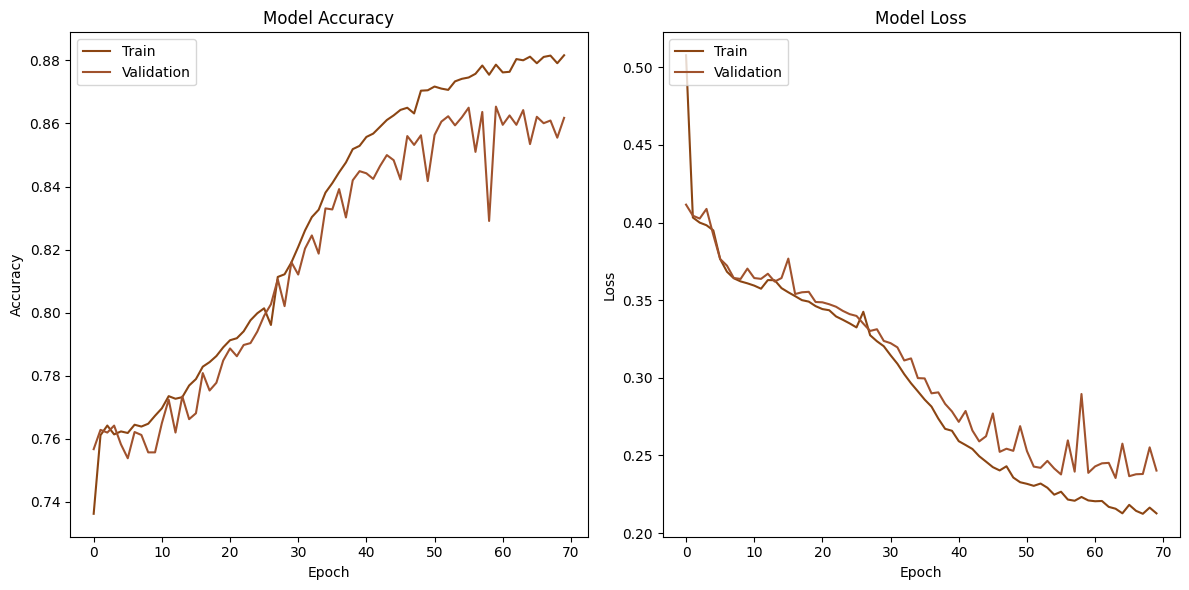

In [15]:
# Plot learning curve
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

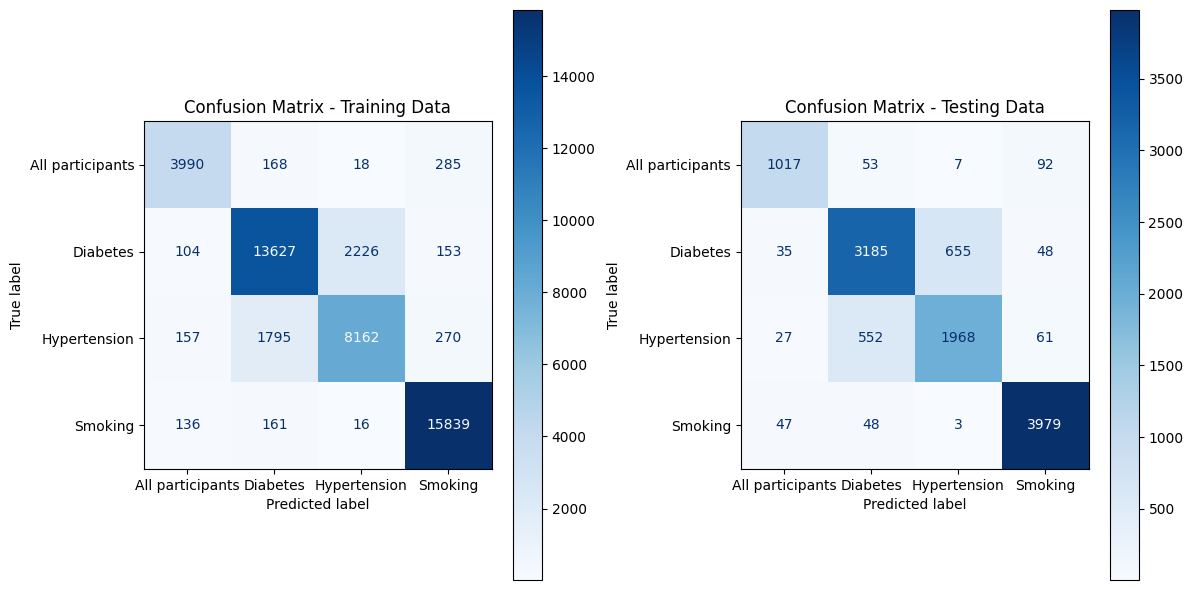

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training confusion matrix
cm_train = confusion_matrix(y_train, train_predictions)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=label_encoder.classes_)
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title('Confusion Matrix - Training Data')

# Testing confusion matrix
cm_test = confusion_matrix(y_test, test_predictions)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)
disp_test.plot(ax=axes[1], cmap=plt.cm.Blues, values_format='d')
axes[1].set_title('Confusion Matrix - Testing Data')

plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import classification_report

# Assuming your input data is in the form (num_samples, timesteps, features)
# Example reshape if your data is 2D:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add a third dimension if needed
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model with GRU layer
model = Sequential()

# Add GRU layer
model.add(GRU(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add output layer
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

# Predictions on training data
train_predictions = np.argmax(model.predict(X_train), axis=1)

# Predictions on testing data
test_predictions = np.argmax(model.predict(X_test), axis=1)

# Classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, train_predictions))

# Classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, test_predictions))


Epoch 1/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7050 - loss: 0.6103 - val_accuracy: 0.7547 - val_loss: 0.4106
Epoch 2/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7625 - loss: 0.4006 - val_accuracy: 0.7564 - val_loss: 0.3980
Epoch 3/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7617 - loss: 0.3960 - val_accuracy: 0.7600 - val_loss: 0.3930
Epoch 4/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7572 - loss: 0.3939 - val_accuracy: 0.7559 - val_loss: 0.3977
Epoch 5/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7577 - loss: 0.3818 - val_accuracy: 0.7639 - val_loss: 0.3787
Epoch 6/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7610 - loss: 0.3801 - val_accuracy: 0.7611 - val_loss: 0.3744
Epoch 7/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7593 - loss: 0.3711 - val_accuracy: 0.7633 - val_loss: 0.3712
Epoch 8/70
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7573 - loss: 0.3652 - 

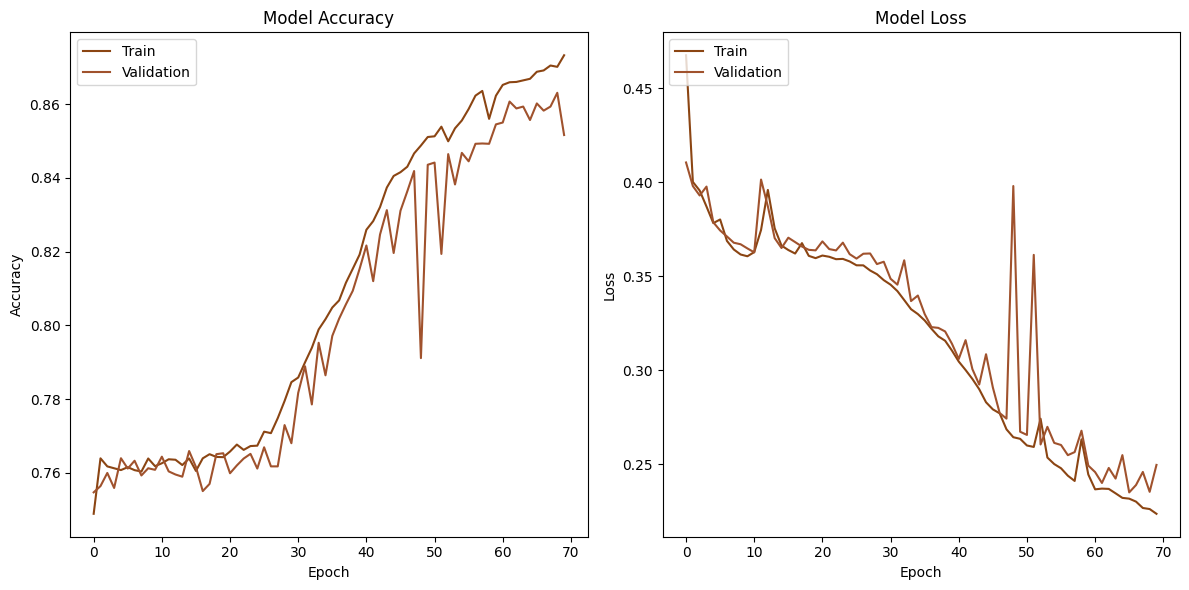

In [18]:
# Plot learning curve
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

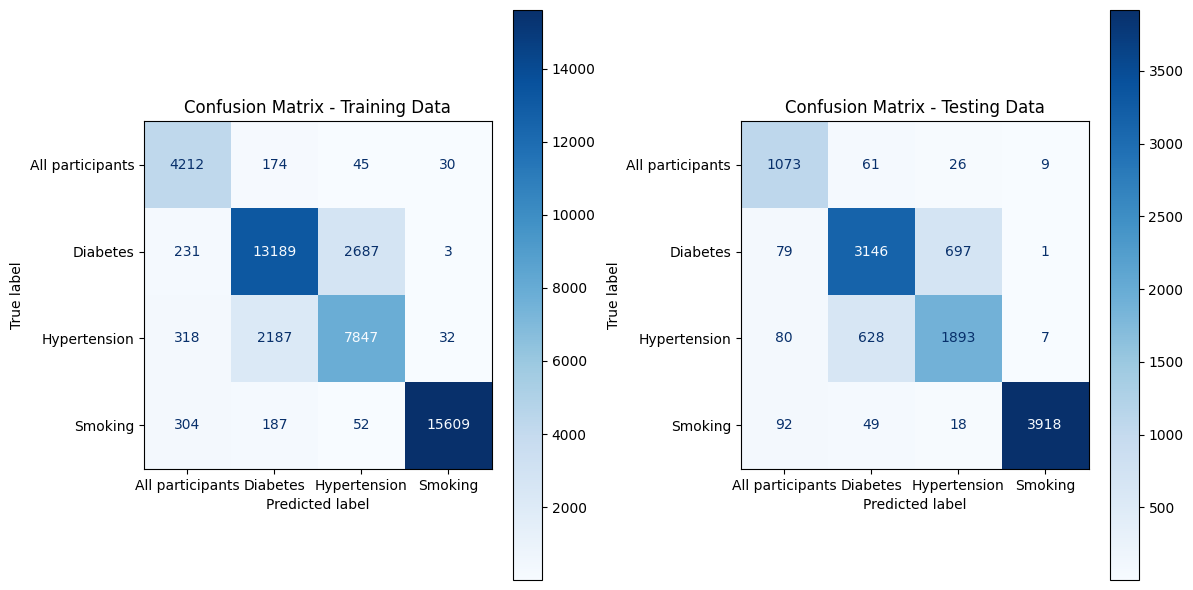

In [19]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training confusion matrix
cm_train = confusion_matrix(y_train, train_predictions)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=label_encoder.classes_)
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title('Confusion Matrix - Training Data')

# Testing confusion matrix
cm_test = confusion_matrix(y_test, test_predictions)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)
disp_test.plot(ax=axes[1], cmap=plt.cm.Blues, values_format='d')
axes[1].set_title('Confusion Matrix - Testing Data')

plt.tight_layout()
plt.show()